# Exercise 3

In [1]:
from Exercise3 import ICM,Block_ICM,evaluate_energy
from tsukuba_model import all_models
from tsukuba_visualize import to_image
import matplotlib.pyplot as plt
from grid import determine_grid

import time

### Exercise 3.1

#### ICM
Type: Primal

Guarantees: None, but in each iteration the cost decreases

Complexity per iteration: O(N\*L) where N is the number of nodes and L is the number of labels. In each node it has to check all the labels and take the minimum

MODEL DOWN 32
(12, 9)
Objective cost= 404.0
Time elapsed 8.177757263183594e-05


MODEL DOWN 16
(24, 18)
Objective cost= 1370.0
Time elapsed 0.0003859996795654297


MODEL DOWN 8
(48, 36)
Objective cost= 4770.0
Time elapsed 0.002798795700073242


MODEL DOWN 4
(96, 72)
Objective cost= 16714.0
Time elapsed 0.01364898681640625


MODEL DOWN 2
(192, 144)
Objective cost= 63098.0
Time elapsed 0.05653882026672363


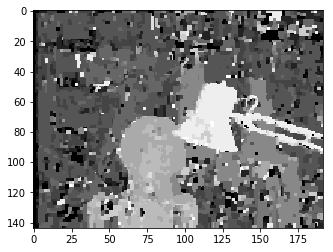

MODEL DOWN 1
(384, 288)
Objective cost= 253475.0
Time elapsed 0.2174053192138672


In [2]:

models=all_models()
count=0
for model in models:
    print('MODEL DOWN',2**(5-count))
    
    grid=determine_grid(model[0],model[1])
    assignment=ICM(grid)
    start= time.time()
    energy=evaluate_energy(grid._nodes, grid._edges, assignment)
    end= time.time()
    img_size=(12*(2**count),9*(2**count))
    print (img_size)
    print('Objective cost=',energy)
    print('Time elapsed', end-start)
    img=to_image(assignment,img_size)
    plt.imshow(img)
    plt.show()
    count=count+1


#### BLOCK-ICM

Type: Primal

Guarantees: None, but in each iteration the cost decreases

Complexity per iteration: O(D\*(V\*L²)) where D is the number of subgraphs, V is the number of nodes per subgraph and L the number of labels. We use Dynamic Programming, which has a complexity O(V\*L²) to find the minimimum of a subgraph .

MODEL DOWN 32
(12, 9)
Objective cost= 336.0
Time elapsed 0.00011658668518066406


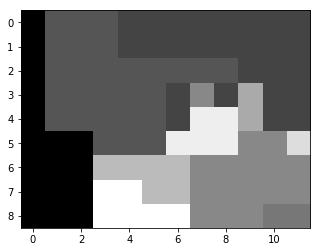

MODEL DOWN 16
(24, 18)
Objective cost= 1067.0
Time elapsed 0.0007572174072265625


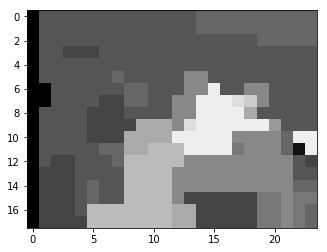

MODEL DOWN 8
(48, 36)
Objective cost= 3525.0
Time elapsed 0.0034170150756835938


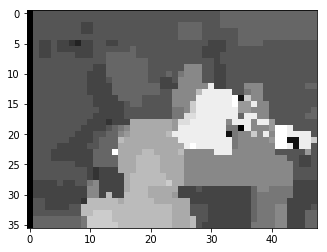

MODEL DOWN 4
(96, 72)
Objective cost= 11160.0
Time elapsed 0.01468515396118164


MODEL DOWN 2
(192, 144)
Objective cost= 36497.0
Time elapsed 0.05978536605834961


MODEL DOWN 1
(384, 288)
Objective cost= 135502.0
Time elapsed 0.2791168689727783


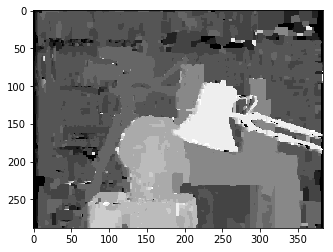

In [3]:

from Exercise3 import ICM,Block_ICM,evaluate_energy
from tsukuba_model import all_models
from tsukuba_visualize import to_image
import matplotlib.pyplot as plt
from grid import determine_grid


models=all_models()
count=0
for model in models:
    print('MODEL DOWN',2**(5-count))
    grid=determine_grid(model[0],model[1])
    assignment=Block_ICM(grid)
    start= time.time()
    energy=evaluate_energy(grid._nodes, grid._edges, assignment)
    end= time.time()
    img_size=(12*(2**count),9*(2**count))
    print (img_size)
    print('Objective cost=',energy)
    print('Time elapsed', end-start)
    img=to_image(assignment,img_size)
    plt.imshow(img)
    plt.show()
    count=count+1


Comparing the results of ICM and Block-ICM, the first gives noisier outputs. Since Block-ICM minimizes a greater ser of nodes at the same time it can find an smoother and better optimal.